Лабораторная работа № 1 по Нейроинформатике

Персептроны. Процедура обучения Розенбланта

Выполнила: Тимофеева Наталья М8О-408Б-19

Вариант № 16

Часть 2

Разбиение на 4 класса

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras import activations
from matplotlib import pyplot as plt

Данные для обучения

In [25]:
data_xy = np.array([[4.1, -2.2], [2.5, 2.5], [-1.2, 0.6], [-4.3, -4.5], [0.3, 2.7], [4.3, -3.8], [0.6, -0.4], [-4.9, -1.7]])
labels = np.array([[1, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 1], [0, 1], [0, 0]])

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_dim = 2, activation='sigmoid',
                             kernel_initializer = keras.initializers.RandomNormal(stddev = 0.5, mean = 0.0),
                             bias_initializer = keras.initializers.Zeros()))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [27]:
model.fit(data_xy, labels, batch_size = 1, epochs = 500)

Epoch 1/500
8/8 [==============================] - 0s 997us/step - loss: 0.2564 - mae: 0.4736
Epoch 2/500
8/8 [==============================] - 0s 855us/step - loss: 0.2532 - mae: 0.4705
Epoch 3/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2498 - mae: 0.4673
Epoch 4/500
8/8 [==============================] - 0s 854us/step - loss: 0.2463 - mae: 0.4641
Epoch 5/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2432 - mae: 0.4611
Epoch 6/500
8/8 [==============================] - 0s 997us/step - loss: 0.2406 - mae: 0.4584
Epoch 7/500
8/8 [==============================] - 0s 712us/step - loss: 0.2368 - mae: 0.4549
Epoch 8/500
8/8 [==============================] - 0s 997us/step - loss: 0.2342 - mae: 0.4522
Epoch 9/500
8/8 [==============================] - 0s 712us/step - loss: 0.2309 - mae: 0.4490
Epoch 10/500
8/8 [==============================] - 0s 712us/step - loss: 0.2276 - mae: 0.4457
Epoch 11/500
8/8 [==============================] - 0s 713us/st

In [40]:
w, b = model.layers[0].get_weights()
w

array([[ 0.3498479 ,  0.6375578 ],
       [-0.93408614,  0.44285998]], dtype=float32)

In [41]:
b

array([-1.2312579,  1.5048833], dtype=float32)

In [42]:
x1 = [data_xy[7][0]]
y1 = [data_xy[7][1]]
x2 = [i[0] for i in data_xy[[1, 2, 4, 6]]]
y2 = [i[1] for i in data_xy[[1, 2, 4, 6]]]
x3 = [data_xy[3][0]]
y3 = [data_xy[3][1]]
x4 = [i[0] for i in data_xy[[0, 5]]]
y4 = [i[1] for i in data_xy[[0, 5]]]

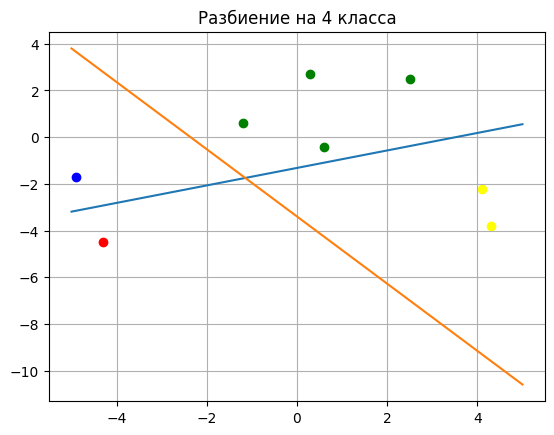

In [43]:
fig, ax = plt.subplots()
ax.scatter(x1, y1, c = 'blue')
ax.scatter(x2, y2, c = 'green')
ax.scatter(x3, y3, c = 'red')
ax.scatter(x4, y4, c = 'yellow')
pl_x = np.linspace(-5, 5, 200)
plt.plot(pl_x, (-pl_x * w[0][0] - b[0]) / w[1][0])
plt.plot(pl_x, (-pl_x * w[0][1] - b[1]) / w[1][1])
ax.set_title('Разбиение на 4 класса')
plt.grid()